In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
USE=False
# Set the impact category to be used
if USE:
    folder = "Resources"
    impact_score = "Abiotic Depletion [kgSb-eq/kWh]"
    cumulative_impact = "Abiotic Depletion [kgSb-eq]"
    threshold_c = "Concern Threshold [kgSb-eq/kWh]"
    threshold_i = "Indifference Threshold [kgSb-eq/kWh]"
    unit= "kgSb-eq/kWh"
else:
    folder = "ClimateChange"
    impact_score = "Climate Change [kgCO2-eq/kWh]"
    cumulative_impact = "Climate Change [kgCO2-eq]"
    threshold_c = "Concern Threshold [kgCO2-eq/kWh]"
    threshold_i = "Indifference Threshold [kgCO2-eq/kWh]"
    unit= "kgCO2-eq/kWh"

Load the data for a run combining 10 threshold of concern with 10 thresholds of indifference

In [65]:
# Load the data
results_df = pd.read_csv(f"results/{folder}/batch_fixed_seed.csv")

In [66]:
# Select the columns
df = results_df[['Year', 'RunId', 'seed', 'threshold_concern', 'threshold_indifference', 'negative_feedback', 'positive_feedback', 
                 'Impact count', 'Total product', "Effect", "eol - new sold weight", "eol - used sold weight", 'eol - new recycled weight',
                   'eol - used recycled weight', 'eol - new landfilled weight', 'eol - used landfilled weight' ]].copy()

# Calculate Yearly electricity production and Impact
df.loc[:, 'Yearly electricity production'] = df.loc[:, 'Total product'] * 1.825  # conversion from Wp to kWh/year considering 5 hours of peak sun per day
df.loc[:, 'Impact'] = df.loc[:, 'Yearly electricity production'] * df.loc[:, 'Impact count']

# Calculate the total end-of-life paths
df['EoL - sold'] = df['eol - new sold weight'] + df['eol - used sold weight']
df['EoL - recycled'] = df['eol - new recycled weight'] + df['eol - used recycled weight']
df['EoL - landfilled'] = df['eol - new landfilled weight'] + df['eol - used landfilled weight']


total_end_of_life = df['EoL - sold'] + df['EoL - recycled'] + df['EoL - landfilled']

# Avoid division by zero by replacing zero totals with NaN
total_end_of_life = total_end_of_life.replace(0, float('nan'))

# Calculate the percentages
df.loc[:, 'EoL - sold'] = 100 * df.loc[:, 'EoL - sold'] / total_end_of_life
df.loc[:, 'EoL - recycled'] = 100 * df.loc[:, 'EoL - recycled'] / total_end_of_life
df.loc[:, 'EoL - circular pathways'] = df.loc[:, 'EoL - sold'] + df.loc[:, 'EoL - recycled']
df.loc[:, 'EoL - landfilled'] = 100 * df.loc[:, 'EoL - landfilled'] / total_end_of_life

df = df.fillna(0)

# Aggregate the data to model level
results_df_agg = df.groupby(['RunId', 'Year', 'seed']).agg({
    'threshold_concern': 'first',
    'threshold_indifference': 'first',
    'negative_feedback': 'first',
    'positive_feedback': 'first',
    'Impact count': 'first',
    'Impact': 'first',
    'Total product': 'first',
    'EoL - circular pathways': 'first',
    'EoL - landfilled': 'first',
    'Effect': 'first'
}).reset_index()

# Calculate cumulative impact per year
results_df_agg['Cumulative impact'] = results_df_agg.groupby(['Year', 'RunId', 'seed', 'threshold_concern', 'threshold_indifference', 'negative_feedback', 'positive_feedback'])['Impact'].cumsum()

results_df_agg.head(100)

,RunId,Year,seed,threshold_concern,threshold_indifference,negative_feedback,positive_feedback,Impact count,Impact,Total product,EoL - circular pathways,EoL - landfilled,Effect,Cumulative impact
0,0,2020,1,0.193,0.1300,-0.5,1,0.187342,1.399088e+10,4.092100e+10,0.000000,0.000000,0.0,1.399088e+10
1,0,2021,1,0.193,0.1300,-0.5,1,0.187342,1.631337e+10,4.771389e+10,0.425489,99.574511,0.0,1.631337e+10
2,0,2022,1,0.193,0.1300,-0.5,1,0.191433,1.943672e+10,5.563439e+10,0.223285,99.776715,0.0,1.943672e+10
3,0,2023,1,0.193,0.1300,-0.5,1,0.191865,2.271441e+10,6.486970e+10,0.159762,99.840238,0.0,2.271441e+10
4,0,2024,1,0.193,0.1300,-0.5,1,0.192002,2.650383e+10,7.563807e+10,0.130958,99.869042,0.0,2.650383e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,2022,1,0.193,0.1495,-0.5,1,0.191433,1.943672e+10,5.563439e+10,0.223285,99.776715,0.0,1.943672e+10
96,3,2023,1,0.193,0.1495,-0.5,1,0.191865,2.271441e+10,6.486970e+10,0.159762,99.840238,0.0,2.271441e+10
97,3,2024,1,0.193,0.1495,-0.5,1,0.192002,2.650383e+10,7.563807e+10,0.130958,99.869042,0.0,2.650383e+10
98,3,2025,1,0.193,0.1495,-0.5,1,0.192064,3.091344e+10,8.819399e+10,0.115944,99.884056,0.0,3.091344e+10


Variation of the threshold of concern: fix the threshold of indifference to the min (no threshold) and plot the results for the threshold of concern.

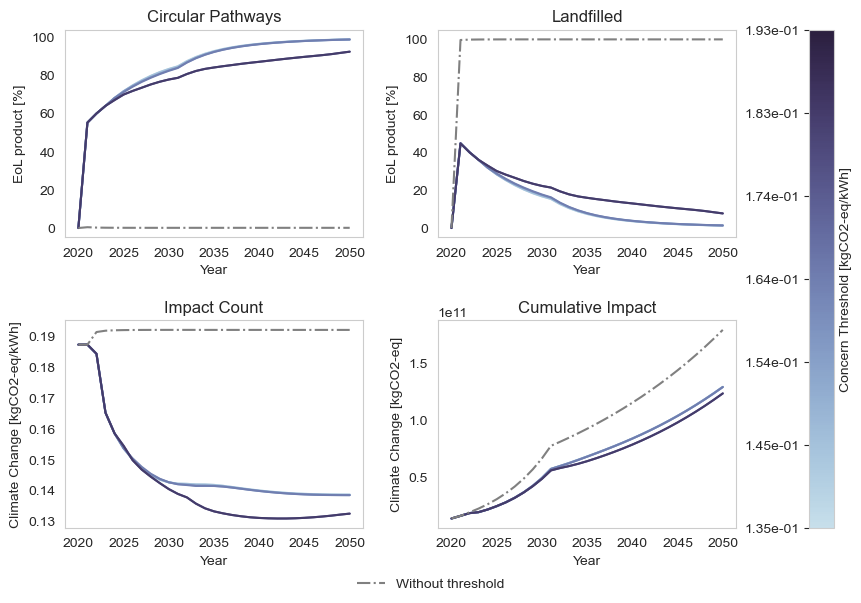

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define the color palette
color_palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
indifference_threshold = results_df_agg["threshold_indifference"].min()

sns.set_style("whitegrid")

# Filter the DataFrame
filtered_df = results_df_agg[(results_df_agg["threshold_indifference"] == indifference_threshold) 
                             & (results_df_agg["seed"] == 1) 
                             & (results_df_agg['threshold_concern'] > 1* indifference_threshold)]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Plot configurations
plot_configs = [
    {"y": "EoL - circular pathways", "ylabel": "EoL product [%]", "title": "Circular Pathways", "ax": axs[0, 0]},
    {"y": "EoL - landfilled", "ylabel": "EoL product [%]", "title": "Landfilled", "ax": axs[0, 1]},
    {"y": "Cumulative impact", "ylabel": cumulative_impact, "xlabel": "Year", "title": "Cumulative Impact", "ax": axs[1, 1]},
    {"y": "Impact count", "ylabel": impact_score, "xlabel": "Year", "title": "Impact Count", "ax": axs[1, 0]},
]

# Create line plots
for config in plot_configs:
    g = sns.lineplot(
        data=filtered_df,
        x="Year",
        y=config["y"],
        hue="threshold_concern",
        palette=color_palette,
        ax=config["ax"],
        legend=False,
    )
    g.set(ylabel=config["ylabel"], title=config["title"])
    if "xlabel" in config:
        g.set(xlabel=config["xlabel"])

# Remove grid
for ax in axs.flat:
    ax.grid(False)

# Add space between the 2 rows of subplots
plt.subplots_adjust(top=0.95, bottom=0.12, right=0.999, left=0.1, hspace=0.4, wspace=0.25)


# For max concern threshold, color = grey
for ax in axs.flat:
    ax.lines[-1].set_linestyle("-.")
    ax.lines[-1].set_linewidth(1.5)
    ax.lines[-1].set_color("grey")

# Create a single color bar for all subplots
unique_thresholds = np.sort(filtered_df['threshold_concern'].unique())
norm = plt.Normalize(unique_thresholds.min(), unique_thresholds.max())
sm = plt.cm.ScalarMappable(cmap=color_palette, norm=norm)
sm.set_array([])

# Add the color bar to the figure
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.08, pad=0.09)
cbar.set_label(threshold_c)

# Set the ticks to the unique values of 'threshold_concern'
cbar.set_ticks(unique_thresholds)
cbar.ax.yaxis.tick_left()
cbar.set_ticklabels([f'{val:.2e}' for val in unique_thresholds])

# Add grey line for linear coupling
custom_lines_1 = [Line2D([0], [0], color='grey', linestyle='-.', lw=1.5, label='Without threshold')]
fig.legend(handles=custom_lines_1, loc='lower center', fontsize=10, frameon=False)


# save the plot high quality
plt.savefig(f"results/{folder}/lineplotconcern.png", dpi=300)

Adding the threshold of indifference: fix the threshold of concern and plot the results for the variation of the threshold of indifference.

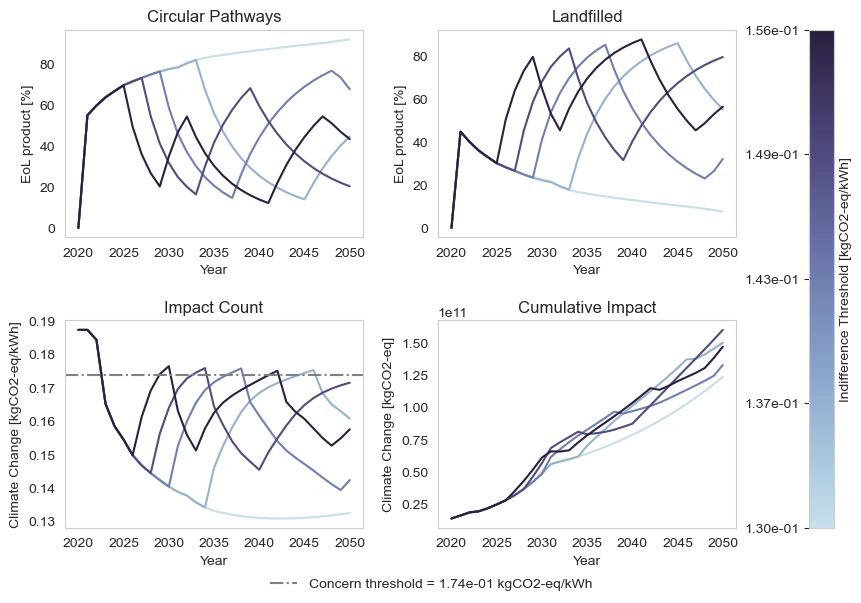

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Set the concern threshold
unique_thresholds1 = np.sort(results_df_agg['threshold_concern'].unique())
concern_threshold = unique_thresholds1[7]  ############################## Change the index to select the concern threshold

# Filter the DataFrame
filtered_df = results_df_agg[(results_df_agg["seed"] == 1) & (results_df_agg["threshold_concern"] == concern_threshold) & (results_df_agg["threshold_indifference"] < 0.9*concern_threshold)]

# Define the color palette
color_palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.set_style("whitegrid")
# linecolors = [color_palette(i / (len(unique_thresholds) - 1)) for i in range(len(unique_thresholds))]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Plot configurations
plot_configs = [
    {"y": "EoL - circular pathways", "ylabel": "EoL product [%]", "title": "Circular Pathways", "ax": axs[0, 0]},
    {"y": "EoL - landfilled", "ylabel": "EoL product [%]", "title": "Landfilled", "ax": axs[0, 1]},
    {"y": "Cumulative impact", "ylabel": cumulative_impact, "xlabel": "Year", "title": "Cumulative Impact", "ax": axs[1, 1]},
    {"y": "Impact count", "ylabel": impact_score, "xlabel": "Year", "title": "Impact Count", "ax": axs[1, 0]},
]

# Create line plots
for config in plot_configs:
    g = sns.lineplot(
        data=filtered_df,
        x="Year",
        y=config["y"],
        hue="threshold_indifference",
        palette=color_palette,
        ax=config["ax"],
        legend=False
    )
    g.set(ylabel=config["ylabel"], title=config["title"])
    if "xlabel" in config:
        g.set(xlabel=config["xlabel"])

# Remove grid
for ax in axs.flat:
    ax.grid(False)

# Add an horizontal for the concern threshold in the lower right subplot
axs[1, 0].axhline(y=concern_threshold, color='grey', linestyle='-.', linewidth=1.5)

# Add space between the 2 rows of subplots
plt.subplots_adjust(top=0.95, bottom=0.12, right=0.999, left=0.1, hspace=0.4, wspace=0.25)

# Create a single color bar for all subplots
unique_thresholds = np.sort(filtered_df['threshold_indifference'].unique())
norm = plt.Normalize(unique_thresholds.min(), unique_thresholds.max())
sm = plt.cm.ScalarMappable(cmap=color_palette, norm=norm)
sm.set_array([])

# Add the color bar to the figure
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.08, pad=0.09)
cbar.set_label(threshold_i)

# Set the ticks to the unique values of 'threshold_concern'
cbar.set_ticks(unique_thresholds)
cbar.ax.yaxis.tick_left()
cbar.set_ticklabels([f'{val:.2e}' for val in unique_thresholds])

# Add grey line for linear coupling
custom_lines_1 = [Line2D([0], [0], color='grey', linestyle='-.', lw=1.5, label=f'Concern threshold = {concern_threshold:.2e} {unit}')]
fig.legend(handles=custom_lines_1, loc='lower center', fontsize=10, frameon=False)

# save the plot high quality
plt.savefig(f"results/{folder}/lineplotindifference/{concern_threshold}.png", dpi=300)

Load data for 100 seeds and each threshold: using shaded area to represent the standard deviation around the mean values.

In [69]:
import pandas as pd

# Initialize an empty DataFrame
results_df = pd.DataFrame()

# Loop to load data based on the concern threshold
for n in range(10):
    # Load the CSV file
    df = pd.read_csv(f"results/{folder}/batch_seed_results{n}.csv")
    
    # Add a RunId column
    df['RunId'] = n

    # Select the columns
    df = df[['Year', 'RunId','threshold_concern', 'threshold_indifference', 'negative_feedback', 'positive_feedback', 
             'Impact count', 'Total product', "Effect", "eol - new sold weight", "eol - used sold weight", 'eol - new recycled weight',
             'eol - used recycled weight', 'eol - new landfilled weight', 'eol - used landfilled weight']].copy()

    # Calculate Yearly electricity production and Impact
    df.loc[:, 'Yearly electricity production'] = df.loc[:, 'Total product'] * 1.825  # conversion from Wp to kWh/year considering 5 hours of peak sun per day
    df.loc[:, 'Impact'] = df.loc[:, 'Yearly electricity production'] * df.loc[:, 'Impact count']

    # Calculate the total end-of-life paths
    df['EoL - sold'] = df['eol - new sold weight'] + df['eol - used sold weight']
    df['EoL - recycled'] = df['eol - new recycled weight'] + df['eol - used recycled weight']
    df['EoL - landfilled'] = df['eol - new landfilled weight'] + df['eol - used landfilled weight']

    total_end_of_life = df['EoL - sold'] + df['EoL - recycled'] + df['EoL - landfilled']

    # Avoid division by zero by replacing zero totals with NaN
    total_end_of_life = total_end_of_life.replace(0, float('nan'))

    # Calculate the percentages
    df.loc[:, 'EoL - sold'] = 100 * df.loc[:, 'EoL - sold'] / total_end_of_life
    df.loc[:, 'EoL - recycled'] = 100 * df.loc[:, 'EoL - recycled'] / total_end_of_life
    df.loc[:, 'EoL - circular pathways'] = df.loc[:, 'EoL - sold'] + df.loc[:, 'EoL - recycled']
    df.loc[:, 'EoL - landfilled'] = 100 * df.loc[:, 'EoL - landfilled'] / total_end_of_life

    df = df.fillna(0)

    # Aggregate the data to model level
    df_agg = df.groupby(['RunId', 'Year', 'threshold_concern', 'threshold_indifference', 'negative_feedback', 'positive_feedback']).agg({
        'Effect': ['mean', 'std'],
        'Total product': ['mean', 'std'],
        'EoL - circular pathways': ['mean', 'std'],
        'EoL - landfilled': ['mean', 'std'],
        'Impact': ['mean', 'std'],
        'Impact count': ['mean', 'std'],
    }).reset_index()
    # Flatten the MultiIndex columns
    df_agg.columns = ['_'.join(col).strip() if col[1] else col[0] for col in df_agg.columns.values]
    # Calculate cumulative impact per year
    df_agg['Cumulative impact_mean'] = df_agg.groupby(['Year', 'RunId', 'threshold_concern', 'threshold_indifference', 'negative_feedback', 'positive_feedback'])['Impact_mean'].cumsum()

    # Concatenate the DataFrame to the results_df
    results_df = pd.concat([results_df, df_agg], ignore_index=True)

results_df.head(100)

,RunId,Year,threshold_concern,threshold_indifference,negative_feedback,positive_feedback,Effect_mean,Effect_std,Total product_mean,Total product_std,EoL - circular pathways_mean,EoL - circular pathways_std,EoL - landfilled_mean,EoL - landfilled_std,Impact_mean,Impact_std,Impact count_mean,Impact count_std,Cumulative impact_mean
0,0,2020,0.19300,0,-0.5,1,0.00,0.000000,4.092100e+10,0.0,0.000000,0.000000,0.000000,0.000000,1.399088e+10,0.000000e+00,0.187342,0.000000,1.399088e+10
1,0,2021,0.19300,0,-0.5,1,0.00,0.000000,4.771389e+10,0.0,0.328347,0.218843,99.671653,0.218843,1.631337e+10,0.000000e+00,0.187342,0.000000,1.631337e+10
2,0,2022,0.19300,0,-0.5,1,0.00,0.000000,5.563439e+10,0.0,0.257338,0.209638,99.742662,0.209638,1.945807e+10,4.735654e+07,0.191643,0.000466,1.945807e+10
3,0,2023,0.19300,0,-0.5,1,0.00,0.000000,6.486970e+10,0.0,0.242502,0.231654,99.757498,0.231654,2.270598e+10,5.300478e+07,0.191794,0.000448,2.270598e+10
4,0,2024,0.19300,0,-0.5,1,0.00,0.000000,7.563807e+10,0.0,0.243552,0.256398,99.756448,0.256398,2.647954e+10,6.826350e+07,0.191826,0.000495,2.647954e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,2022,0.16405,0,-0.5,1,1.00,0.000000,5.563439e+10,0.0,60.382748,1.003015,39.617252,1.003015,1.873133e+10,8.483245e+07,0.184486,0.000836,1.873133e+10
96,3,2023,0.16405,0,-0.5,1,0.84,0.366608,6.486970e+10,0.0,64.447467,1.206265,35.552533,1.206265,1.958203e+10,1.577409e+08,0.165407,0.001332,1.958203e+10
97,3,2024,0.16405,0,-0.5,1,0.00,0.000000,7.563807e+10,0.0,67.694296,1.588180,32.305704,1.588180,2.178577e+10,2.422801e+08,0.157823,0.001755,2.178577e+10
98,3,2025,0.16405,0,-0.5,1,0.00,0.000000,8.819399e+10,0.0,69.643018,3.233570,30.356982,3.233570,2.463348e+10,3.026629e+08,0.153047,0.001880,2.463348e+10


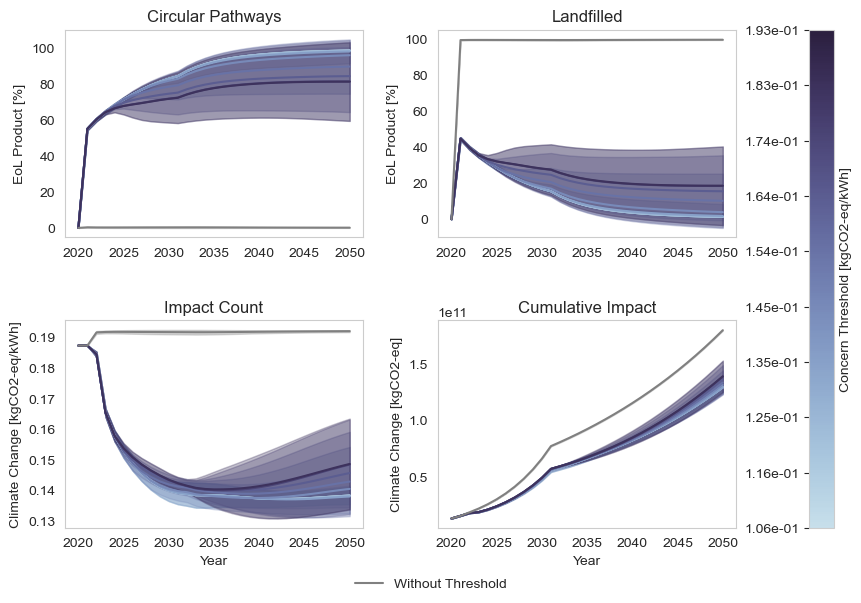

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define the color palette
color_palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

sns.set_style("whitegrid")

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Plot configurations
plot_configs = [
    {"y": "EoL - circular pathways_mean", "y_std": "EoL - circular pathways_std", "ylabel": "EoL Product [%]", "title": "Circular Pathways", "ax": axs[0, 0]},
    {"y": "EoL - landfilled_mean", "y_std": "EoL - landfilled_std", "ylabel": "EoL Product [%]", "title": "Landfilled", "ax": axs[0, 1]},
    {"y": "Cumulative impact_mean", "y_std": "Impact_std", "ylabel": cumulative_impact, "xlabel": "Year", "title": "Cumulative Impact", "ax": axs[1, 1]},
    {"y": "Impact count_mean", "y_std": "Impact count_std", "ylabel": impact_score, "xlabel": "Year", "title": "Impact Count", "ax": axs[1, 0]},
]

# Normalize the threshold values
unique_thresholds = np.sort(results_df['threshold_concern'].unique())
norm = plt.Normalize(unique_thresholds.min(), unique_thresholds.max())

# Create line plots with shaded areas for standard deviation
for config in plot_configs:
    for key, grp in results_df.groupby('threshold_concern'):
        ax = config["ax"]
        x = grp['Year']
        y = grp[config["y"]]
        y_std = grp[config["y_std"]]
        
        # Set color based on whether the threshold is the maximum
        if key == unique_thresholds.max():
            color = "grey"
        else:
            color = color_palette(norm(key))
        
        ax.plot(x, y, label=f'Threshold {key:.2e}', color=color)
        ax.fill_between(x, y - y_std, y + y_std, color=color, alpha=0.3)
        
        ax.set(ylabel=config["ylabel"], title=config["title"])
        if "xlabel" in config:
            ax.set(xlabel=config["xlabel"])

# Remove grid
for ax in axs.flat:
    ax.grid(False)

# Add space between the 2 rows of subplots
plt.subplots_adjust(top=0.95, bottom=0.12, right=0.999, left=0.1, hspace=0.4, wspace=0.25)

# Create a single color bar for all subplots
sm = plt.cm.ScalarMappable(cmap=color_palette, norm=norm)
sm.set_array([])

# Add the color bar to the figure
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.08, pad=0.09)
cbar.set_label(threshold_c)

# Set the ticks to the unique values of 'threshold_concern'
cbar.set_ticks(unique_thresholds)
cbar.ax.yaxis.tick_left()
cbar.set_ticklabels([f'{val:.2e}' for val in unique_thresholds])

# Add grey line for linear coupling
custom_lines_1 = [Line2D([0], [0], color='grey', linestyle='-', lw=1.5, label='Without Threshold')]
fig.legend(handles=custom_lines_1, loc='lower center', fontsize=10, frameon=False)

# Save the plot
plt.savefig(f"results/{folder}/lineplotconcern_sd.png", dpi=300)

# Show the plot
plt.show()

Closer look at the situation after 30 years: figures of the results for each threshold in 2050 (100 runs). High variability across runs

In [71]:
# Initialize an empty DataFrame
results_df_year_30 = pd.DataFrame()

# Loop to load data based on the concern threshold
for n in range(10):
    # Load the CSV file
    df = pd.read_csv(f"results/{folder}/batch_seed_results{n}.csv")
    
    # Add a RunId column
    df['RunId'] = n

    # Select the columns
    df = df[['Year', 'RunId','seed','threshold_concern', 'threshold_indifference', 'negative_feedback', 'positive_feedback', 
             'Impact count', 'Total product', "Effect", "eol - new sold weight", "eol - used sold weight", 'eol - new recycled weight',
             'eol - used recycled weight', 'eol - new landfilled weight', 'eol - used landfilled weight']].copy()
    
    # Filter the DataFrame for year 30
    df = df[df['Year'] == 2050]

    # Calculate Yearly electricity production and Impact
    df.loc[:, 'Yearly electricity production'] = df.loc[:, 'Total product'] * 1.825  # conversion from Wp to kWh/year considering 5 hours of peak sun per day
    df.loc[:, 'Impact'] = df.loc[:, 'Yearly electricity production'] * df.loc[:, 'Impact count']

    # Calculate the total end-of-life paths
    df['EoL - sold'] = df['eol - new sold weight'] + df['eol - used sold weight']
    df['EoL - recycled'] = df['eol - new recycled weight'] + df['eol - used recycled weight']
    df['EoL - landfilled'] = df['eol - new landfilled weight'] + df['eol - used landfilled weight']

    total_end_of_life = df['EoL - sold'] + df['EoL - recycled'] + df['EoL - landfilled']

    # Avoid division by zero by replacing zero totals with NaN
    total_end_of_life = total_end_of_life.replace(0, float('nan'))

    # Calculate the percentages
    df.loc[:, 'EoL - sold'] = 100 * df.loc[:, 'EoL - sold'] / total_end_of_life
    df.loc[:, 'EoL - recycled'] = 100 * df.loc[:, 'EoL - recycled'] / total_end_of_life
    df.loc[:, 'EoL - circular pathways'] = df.loc[:, 'EoL - sold'] + df.loc[:, 'EoL - recycled']
    df.loc[:, 'EoL - landfilled'] = 100 * df.loc[:, 'EoL - landfilled'] / total_end_of_life

    df = df.fillna(0)

    # Aggregate the data to model level
    df_agg = df.groupby(['RunId', 'Year', 'seed']).agg({
        'threshold_concern': 'first',
        'threshold_indifference': 'first',
        'negative_feedback': 'first',
        'positive_feedback': 'first',
        'Impact count': 'first',
        'Impact': 'first',
        'Total product': 'first',
        'EoL - circular pathways': 'first',
        'EoL - landfilled': 'first',
        'Effect': 'first'}).reset_index()
    # Calculate cumulative impact per year
    df_agg['Cumulative impact'] = df_agg.groupby(['Year', 'RunId','seed', 'threshold_concern', 'threshold_indifference', 'negative_feedback', 'positive_feedback'])['Impact'].cumsum()

    # Concatenate the DataFrame to the results_df
    results_df_year_30 = pd.concat([results_df_year_30, df_agg], ignore_index=True)

results_df_year_30.head(100)

,RunId,Year,seed,threshold_concern,threshold_indifference,negative_feedback,positive_feedback,Impact count,Impact,Total product,EoL - circular pathways,EoL - landfilled,Effect,Cumulative impact
0,0,2050,0,0.193,0,-0.5,1,0.192347,1.795509e+11,5.114931e+11,0.000424,99.999576,0,1.795509e+11
1,0,2050,1,0.193,0,-0.5,1,0.192123,1.793423e+11,5.114931e+11,0.102360,99.897640,0,1.793423e+11
2,0,2050,2,0.193,0,-0.5,1,0.192289,1.794965e+11,5.114931e+11,0.024996,99.975004,0,1.794965e+11
3,0,2050,3,0.193,0,-0.5,1,0.191904,1.791377e+11,5.114931e+11,0.195615,99.804385,0,1.791377e+11
4,0,2050,4,0.193,0,-0.5,1,0.191899,1.791329e+11,5.114931e+11,0.204183,99.795817,0,1.791329e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,2050,95,0.193,0,-0.5,1,0.191674,1.789228e+11,5.114931e+11,0.308091,99.691909,0,1.789228e+11
96,0,2050,96,0.193,0,-0.5,1,0.192276,1.794847e+11,5.114931e+11,0.030326,99.969674,0,1.794847e+11
97,0,2050,97,0.193,0,-0.5,1,0.192346,1.795501e+11,5.114931e+11,0.000809,99.999191,0,1.795501e+11
98,0,2050,98,0.193,0,-0.5,1,0.191854,1.790908e+11,5.114931e+11,0.209009,99.790991,0,1.790908e+11


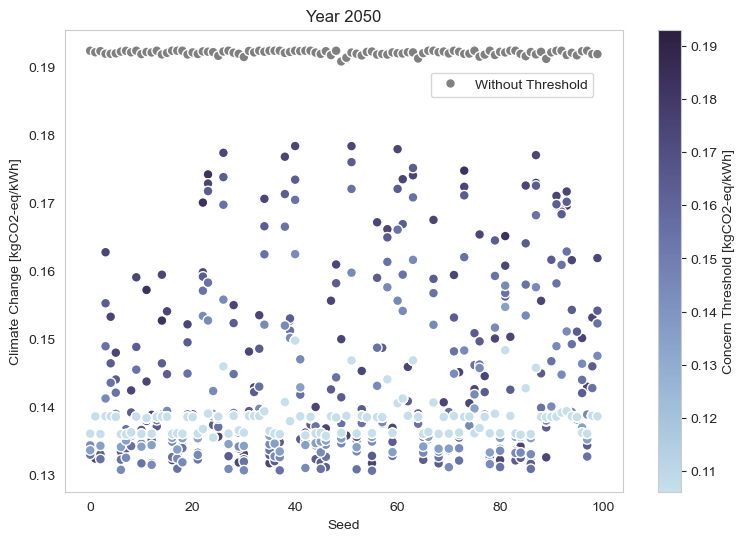

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette

sns.set_style("whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(9, 6))

# Plot configurations
x_var = "seed"
y_var = "Impact count"
hue_var = "threshold_concern"

# Identify the highest concern threshold
max_threshold = results_df_year_30[hue_var].max()

# Define the color palette
color_palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

# Create the attractor map
colors = results_df_year_30[hue_var].apply(lambda x: 'grey' if x == max_threshold else color_palette(norm(x)))

scatter = ax.scatter(
    results_df_year_30[x_var],
    results_df_year_30[y_var],
    c=colors,
    # alpha=0.7,
    edgecolor='w',
    s=50
)

# Add labels and title
ax.set_xlabel("Seed")
ax.set_ylabel(impact_score)
ax.set_title("Year 2050")
ax.grid(False)

# Add a color bar
norm = plt.Normalize(results_df_year_30[hue_var].min(), results_df_year_30[hue_var].max())
sm = plt.cm.ScalarMappable(cmap=color_palette, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(threshold_c)

# Add custom legend with just a dot
custom_lines = [Line2D([0], [0], color='grey', marker='o', linestyle='None', markersize=5, label='Without Threshold')]
fig.legend(handles=custom_lines, loc='upper right', bbox_to_anchor=(0.72, 0.82))

plt.savefig(f"results/{folder}/scatter_plot.png", dpi=300)

C:\Users\fuortesa\AppData\Local\Temp\ipykernel_20868\2988429973.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(


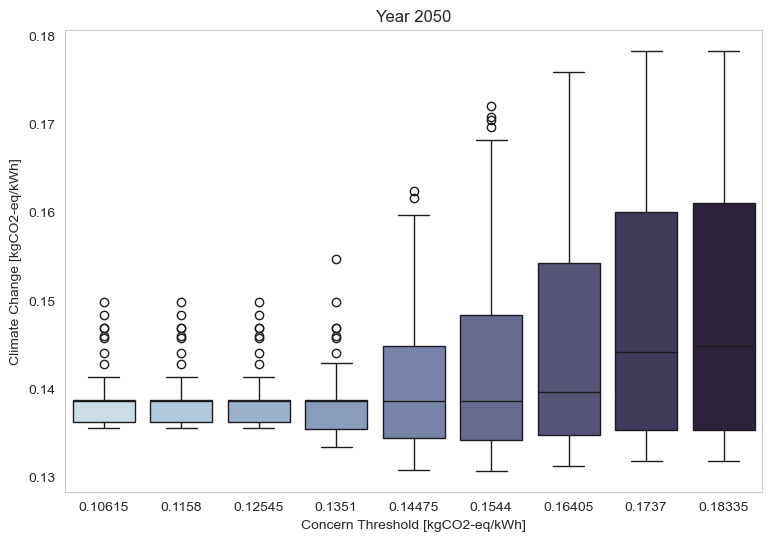

In [73]:
# Identify the highest concern threshold
max_threshold = results_df_year_30["threshold_concern"].max()

# Exclude the maximum threshold from the results
results_df_filtered = results_df_year_30[results_df_year_30["threshold_concern"] != max_threshold]

# Define the color palette
color_palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=False, n_colors=len(results_df_filtered["threshold_concern"].unique()))

sns.set_style("whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(9, 6))

# Plot configurations
x_var = "threshold_concern"
y_var = "Impact count"

# Create the box and whisker plot
boxplot = sns.boxplot(
    data=results_df_filtered,
    x=x_var,
    y=y_var,
    palette=color_palette,
    ax=ax
)

# Add labels and title
ax.set_xlabel(threshold_c)
ax.set_ylabel(impact_score)
ax.set_title("Year 2050")
ax.grid(False)

plt.savefig(f"results/{folder}/box_plot.png", dpi=300)

Figure for the graphical abstract

In [74]:
import pandas as pd

# Initialize an empty DataFrame
results_df = pd.DataFrame()

# Loop to load data based on the concern threshold
for n in (0,1,6):
    # Load the CSV file
    df = pd.read_csv(f"results/{folder}/batch_seed_results{n}.csv")
    
    # Add a RunId column
    df['RunId'] = n

    # Select the columns
    df = df[['Year', 'RunId','threshold_concern', 'threshold_indifference', 'negative_feedback', 'positive_feedback', 
             'Impact count', 'Total product', "Effect", "eol - new sold weight", "eol - used sold weight", 'eol - new recycled weight',
             'eol - used recycled weight', 'eol - new landfilled weight', 'eol - used landfilled weight']].copy()

    # Calculate Yearly electricity production and Impact
    df.loc[:, 'Yearly electricity production'] = df.loc[:, 'Total product'] * 1.825  # conversion from Wp to kWh/year considering 5 hours of peak sun per day
    df.loc[:, 'Impact'] = df.loc[:, 'Yearly electricity production'] * df.loc[:, 'Impact count']

    # Calculate the total end-of-life paths
    df['EoL - sold'] = df['eol - new sold weight'] + df['eol - used sold weight']
    df['EoL - recycled'] = df['eol - new recycled weight'] + df['eol - used recycled weight']
    df['EoL - landfilled'] = df['eol - new landfilled weight'] + df['eol - used landfilled weight']

    total_end_of_life = df['EoL - sold'] + df['EoL - recycled'] + df['EoL - landfilled']

    # Avoid division by zero by replacing zero totals with NaN
    total_end_of_life = total_end_of_life.replace(0, float('nan'))

    # Calculate the percentages
    df.loc[:, 'EoL - sold'] = 100 * df.loc[:, 'EoL - sold'] / total_end_of_life
    df.loc[:, 'EoL - recycled'] = 100 * df.loc[:, 'EoL - recycled'] / total_end_of_life
    df.loc[:, 'EoL - circular pathways'] = df.loc[:, 'EoL - sold'] + df.loc[:, 'EoL - recycled']
    df.loc[:, 'EoL - landfilled'] = 100 * df.loc[:, 'EoL - landfilled'] / total_end_of_life

    df = df.fillna(0)

    # Aggregate the data to model level
    df_agg = df.groupby(['RunId', 'Year', 'threshold_concern', 'threshold_indifference', 'negative_feedback', 'positive_feedback']).agg({
        'Effect': ['mean', 'std'],
        'Total product': ['mean', 'std'],
        'EoL - circular pathways': ['mean', 'std'],
        'EoL - landfilled': ['mean', 'std'],
        'Impact': ['mean', 'std'],
        'Impact count': ['mean', 'std'],
    }).reset_index()
    # Flatten the MultiIndex columns
    df_agg.columns = ['_'.join(col).strip() if col[1] else col[0] for col in df_agg.columns.values]
    # Calculate cumulative impact per year
    df_agg['Cumulative impact_mean'] = df_agg.groupby(['Year', 'RunId', 'threshold_concern', 'threshold_indifference', 'negative_feedback', 'positive_feedback'])['Impact_mean'].cumsum()

    # Concatenate the DataFrame to the results_df
    results_df = pd.concat([results_df, df_agg], ignore_index=True)

results_df.head(100)

,RunId,Year,threshold_concern,threshold_indifference,negative_feedback,positive_feedback,Effect_mean,Effect_std,Total product_mean,Total product_std,EoL - circular pathways_mean,EoL - circular pathways_std,EoL - landfilled_mean,EoL - landfilled_std,Impact_mean,Impact_std,Impact count_mean,Impact count_std,Cumulative impact_mean
0,0,2020,0.1930,0,-0.5,1,0.00,0.000000,4.092100e+10,0.0,0.000000,0.000000,0.000000,0.000000,1.399088e+10,0.000000e+00,0.187342,0.000000,1.399088e+10
1,0,2021,0.1930,0,-0.5,1,0.00,0.000000,4.771389e+10,0.0,0.328347,0.218843,99.671653,0.218843,1.631337e+10,0.000000e+00,0.187342,0.000000,1.631337e+10
2,0,2022,0.1930,0,-0.5,1,0.00,0.000000,5.563439e+10,0.0,0.257338,0.209638,99.742662,0.209638,1.945807e+10,4.735654e+07,0.191643,0.000466,1.945807e+10
3,0,2023,0.1930,0,-0.5,1,0.00,0.000000,6.486970e+10,0.0,0.242502,0.231654,99.757498,0.231654,2.270598e+10,5.300478e+07,0.191794,0.000448,2.270598e+10
4,0,2024,0.1930,0,-0.5,1,0.00,0.000000,7.563807e+10,0.0,0.243552,0.256398,99.756448,0.256398,2.647954e+10,6.826350e+07,0.191826,0.000495,2.647954e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,6,2046,0.1351,0,-0.5,1,0.65,0.476972,4.289184e+11,0.0,97.567346,1.190061,2.432654,1.190061,1.074978e+11,2.377969e+09,0.137329,0.003038,1.074978e+11
89,6,2047,0.1351,0,-0.5,1,0.67,0.470215,4.482197e+11,0.0,97.752135,1.179991,2.247865,1.179991,1.124779e+11,2.561719e+09,0.137503,0.003132,1.124779e+11
90,6,2048,0.1351,0,-0.5,1,0.72,0.449001,4.683896e+11,0.0,97.913363,1.165655,2.086637,1.165655,1.176981e+11,2.787216e+09,0.137689,0.003261,1.176981e+11
91,6,2049,0.1351,0,-0.5,1,0.78,0.414248,4.894671e+11,0.0,98.053375,1.148947,1.946625,1.148947,1.231631e+11,3.034259e+09,0.137878,0.003397,1.231631e+11


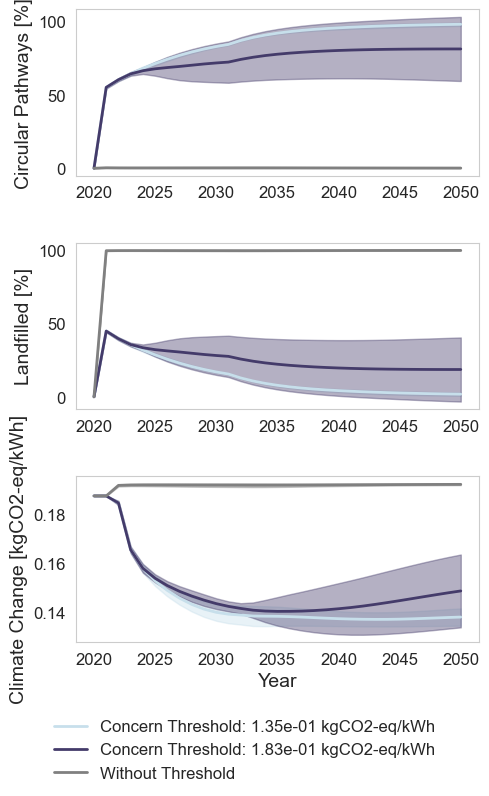

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming results_df is already loaded and processed
# results_df = pd.read_csv("path_to_your_results.csv")

# Define the color palette
color_palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

sns.set_style("whitegrid")

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(5, 8))

# Plot configurations
plot_configs = [
    {"y": "EoL - circular pathways_mean", "y_std": "EoL - circular pathways_std", "ylabel": "Circular Pathways [%]", "ax": axs[0]},
    {"y": "EoL - landfilled_mean", "y_std": "EoL - landfilled_std","ylabel":"Landfilled [%]", "ax": axs[1]},
    # {"y": "Cumulative impact_mean", "y_std": "Impact_std","xlabel": "Year", "ylabel": cumulative_impact, "ax": axs[2]},
    {"y": "Impact count_mean", "y_std": "Impact count_std", "xlabel": "Year", "ylabel": impact_score, "ax": axs[2]},
]

# Normalize the threshold values
unique_thresholds = np.sort(results_df['threshold_concern'].unique())
norm = plt.Normalize(unique_thresholds.min(), unique_thresholds.max())

# Create line plots with shaded areas for standard deviation
for config in plot_configs:
    for key, grp in results_df.groupby('threshold_concern'):
        ax = config["ax"]
        x = grp['Year']
        y = grp[config["y"]]
        y_std = grp[config["y_std"]]
        
        # Set color based on whether the threshold is the maximum
        if key == unique_thresholds.max():
            color = "grey"
        else:
            color = color_palette(norm(key))
        
        ax.plot(x, y, label=f'Threshold {key:.2e}', color=color, linewidth=2)
        ax.fill_between(x, y - y_std, y + y_std, color=color, alpha=0.4)
        
        ax.set(ylabel=config["ylabel"])
        if "xlabel" in config:
            ax.set(xlabel=config["xlabel"])

# Remove grid
for ax in axs.flat:
    ax.grid(False)

# Increase font sizes for better visibility
for ax in axs.flat:
    ax.title.set_fontsize(16)
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust layout with tight_layout and specified hspace and wspace
fig.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.25, bottom=0.19)

# Create custom legend entries for each threshold
legend_elements = [Line2D([0], [0], color=color_palette(norm(threshold)), lw=2, label=f'Concern Threshold: {threshold:.2e} {unit}')
                   for threshold in unique_thresholds if threshold != unique_thresholds.max()]
legend_elements.append(Line2D([0], [0], color='grey', lw=2, label='Without Threshold'))

# Add the custom legend to the figure
fig.legend(handles=legend_elements, loc='lower center', fontsize=12, frameon=False, ncol=1)

# Save the plot
plt.savefig(f"results/{folder}/graphical_abstract.png", dpi=300)

# Show the plot
plt.show()